In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

GHÉP TẤT CẢ DATA TRANSFER

In [ ]:
folder = r'D:\DO_AN_TOT_NGHIEP\DU_LIEU\DATA_TRANSFER'

merged_df = pd.DataFrame()

# Lặp qua từng thư mục năm
for year_folder in os.listdir(folder):
    year_folder_path = os.path.join(folder, year_folder)

    if os.path.isdir(year_folder_path):

        for filename in os.listdir(year_folder_path):
            file_path = os.path.join(year_folder_path, filename)

            if filename.endswith('.csv'):
                df = pd.read_csv(file_path)
                merged_df = pd.concat([merged_df, df], ignore_index=True)

merged_df.to_csv('D:/DO_AN_TOT_NGHIEP/DU_LIEU/DATA_TRANSFER/merged_data.csv', index=False,encoding='utf-8-sig')


GHÉP DATA_TRANSFER THEO TỪNG NĂM

In [ ]:

# Đường dẫn đến folder chứa các file CSV
folder_path = 'D:/DO_AN_TOT_NGHIEP/DU_LIEU/DATA_TRANSFER/2015'

# Khởi tạo DataFrame trống để chứa dữ liệu gộp
merged_df = pd.DataFrame()

# Lặp qua từng file trong folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        
        # Đọc dữ liệu từ file CSV vào DataFrame
        df = pd.read_csv(file_path)
        
        # Gộp DataFrame vào DataFrame chính
        merged_df = pd.concat([merged_df, df], ignore_index=True)

# Ghi DataFrame đã gộp vào một file CSV mới
merged_df.to_csv('D:/DO_AN_TOT_NGHIEP/DU_LIEU/DATA_TRANSFER/2015/DATA_TRANSFER_2015.csv', index=False,encoding='utf-8-sig')


SWAP GIÁ TRỊ CỦA MARKET_VALUE VÀ FEE NẾU FEE = 0 HOẶC FEE = NONE

In [ ]:

# Đọc dữ liệu từ file CSV vào DataFrame
df = pd.read_csv('D:/DO_AN_TOT_NGHIEP/DU_LIEU/DATA_TRANSFER/2015/DATA_TRANSFER_2015.csv')

# Kiểm tra điều kiện và điền giá trị từ market_value sang fee
mask = (df['market_value'].notna()) & ((df['fee'].isna()) | (df['fee'] == 0))
df.loc[mask, 'fee'] = df.loc[mask, 'market_value']
df = df[df['movement'] == 'in']
# Lưu DataFrame đã điều chỉnh lại thành file CSV
df.to_csv('D:/DO_AN_TOT_NGHIEP/DU_LIEU/DATA_TRANSFER/2015/(SWAP)DATA_TRANSFER_2015.csv', index=False, encoding='utf-8-sig')


HỢP DATA_PLAYER VỚI DATA_TRANSFER

In [ ]:

df_player = pd.read_csv('D:/DO_AN_TOT_NGHIEP/DU_LIEU/DATA_PLAYER/FIFA21.csv')

df_transfer = pd.read_csv('D:/DO_AN_TOT_NGHIEP/DU_LIEU/DATA_TRANSFER/2021/(SWAP)DATA_TRANSFER_2021.csv')

df_transfer = df_transfer[(df_transfer['fee'] != 0) & (df_transfer['fee'].notna())]

merged_df = pd.merge(df_player, df_transfer, left_on='long_name', right_on='name', how='inner')

merged_df.to_csv('D:/DO_AN_TOT_NGHIEP/DU_LIEU/MERGE_DATA-PLAYER_DATA-TRANSFER/FINAL_2021.csv', index=False,encoding='utf-8-sig')


XÓA CÁC TRƯỜNG KHÔNG CẦN THIẾT

In [ ]:
df = pd.read_csv('D:/DO_AN_TOT_NGHIEP/DU_LIEU/MERGE_DATA-PLAYER_DATA-TRANSFER/FINAL_2021.csv')
columns_to_drop= ['sofifa_id',
                'player_url',
                'short_name',
                'long_name',
                'dob',
                'club_name',
                'league_rank',
                'league_name',
                'value_eur',
                'wage_eur',
                'player_positions',
                'work_rate',
                'body_type',
                'real_face',
                'release_clause_eur',
                'player_tags',
                'team_position',
                'team_jersey_number',
                'loaned_from',
                'joined',
                'nation_position',
                'nation_jersey_number',
                'pace',
                'shooting',
                'passing',
                'dribbling',
                'defending',
                'physic',
                'gk_diving',
                'gk_handling',
                'gk_kicking',
                'gk_reflexes',
                'gk_speed',
                'gk_positioning',
                'player_traits',
                'club',
                'name',
                'age_x',
                'nationality_y',
                'market_value',
                'movement',
                'is_loan',
                'loan_status',
                'dealing_club',
                'dealing_country']

df = df.drop(columns=columns_to_drop)

df.to_csv('D:/DO_AN_TOT_NGHIEP/DU_LIEU/DATA_FINAL/2021.csv', index=False, encoding='utf-8-sig')


GỘP DỮ LIỆU CÁC NĂM TRONG DATA_FINAL

In [ ]:
folder_path = 'D:/DO_AN_TOT_NGHIEP/DU_LIEU/DATA_FINAL'

merged_df = pd.DataFrame()

# Lặp qua từng file trong folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        
        df = pd.read_csv(file_path)
        
        # Gộp DataFrame vào DataFrame chính
        merged_df = pd.concat([merged_df, df], ignore_index=True)

# Ghi DataFrame đã gộp vào một file CSV mới
merged_df.to_csv('D:/DO_AN_TOT_NGHIEP/DU_LIEU/DATA_FINAL/Final_Data.csv', index=False,encoding='utf-8-sig')

CLEAN DATA

In [6]:
df1 = pd.read_csv("D:/DO_AN_TOT_NGHIEP/DU_LIEU/DATA_FINAL/Final_Data.csv")
df1.head()

,height_cm,weight_kg,nationality,overall,potential,preferred_foot,international_reputation,weak_foot,skill_moves,contract_valid_until,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,180,67,United States,70,80,Right,1,4,3,2023.0,...,53,50.0,60,59,57,14,15,11,12,5.0
1,193,79,Belgium,67,72,Right,1,3,2,2023.0,...,52,68.0,42,59,52,5,13,14,12,6.0
2,177,68,Argentina,80,83,Left,1,3,4,2023.0,...,65,80.0,64,73,68,10,7,10,14,NaN
3,177,68,Argentina,80,83,Left,1,3,4,2023.0,...,65,80.0,64,73,68,10,7,10,14,NaN
4,180,70,Burkina Faso,72,83,Right,1,3,2,2023.0,...,24,54.0,60,67,68,10,8,9,14,13.0


In [7]:
df1.shape

(5762, 51)

In [8]:
missing_data = df1.isna().any()
missing_data[missing_data].index

Index(['contract_valid_until', 'mentality_composure', 'goalkeeping_reflexes'], dtype='object')

In [9]:
df1.isna().sum()
df1.dtypes

height_cm                       int64
weight_kg                       int64
nationality                    object
overall                         int64
potential                       int64
preferred_foot                 object
international_reputation        int64
weak_foot                       int64
skill_moves                     int64
contract_valid_until          float64
age                             int64
position                       object
short_pos                      object
fee                             int64
window                         object
league                         object
season                          int64
attacking_crossing              int64
attacking_finishing             int64
attacking_heading_accuracy      int64
attacking_short_passing         int64
attacking_volleys               int64
skill_dribbling                 int64
skill_curve                     int64
skill_fk_accuracy               int64
skill_long_passing              int64
skill_ball_c

In [10]:
df2 = df1.dropna(subset=['contract_valid_until'])

In [11]:
df2.shape

(5737, 51)

In [12]:
df2.isna().sum()

height_cm                        0
weight_kg                        0
nationality                      0
overall                          0
potential                        0
preferred_foot                   0
international_reputation         0
weak_foot                        0
skill_moves                      0
contract_valid_until             0
age                              0
position                         0
short_pos                        0
fee                              0
window                           0
league                           0
season                           0
attacking_crossing               0
attacking_finishing              0
attacking_heading_accuracy       0
attacking_short_passing          0
attacking_volleys                0
skill_dribbling                  0
skill_curve                      0
skill_fk_accuracy                0
skill_long_passing               0
skill_ball_control               0
movement_acceleration            0
movement_sprint_spee

In [13]:
df2.dtypes

height_cm                       int64
weight_kg                       int64
nationality                    object
overall                         int64
potential                       int64
preferred_foot                 object
international_reputation        int64
weak_foot                       int64
skill_moves                     int64
contract_valid_until          float64
age                             int64
position                       object
short_pos                      object
fee                             int64
window                         object
league                         object
season                          int64
attacking_crossing              int64
attacking_finishing             int64
attacking_heading_accuracy      int64
attacking_short_passing         int64
attacking_volleys               int64
skill_dribbling                 int64
skill_curve                     int64
skill_fk_accuracy               int64
skill_long_passing              int64
skill_ball_c

In [14]:
df2.describe()

,height_cm,weight_kg,overall,potential,international_reputation,weak_foot,skill_moves,contract_valid_until,age,fee,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,5737.000000,5737.000000,5737.000000,5737.000000,5737.000000,5737.000000,5737.000000,5737.000000,5737.000000,5.737000e+03,...,5737.000000,4676.000000,5737.000000,5737.000000,5737.000000,5737.000000,5737.000000,5737.000000,5737.000000,5714.000000
mean,182.621579,75.884434,70.332404,77.580617,1.221544,3.090291,2.607635,2020.260241,23.818546,6.680598e+06,...,52.663936,63.660180,47.616350,49.437162,46.955726,14.507931,14.438731,14.124804,14.513509,14.627756
std,6.583805,7.037189,6.465781,4.888416,0.504412,0.697579,0.801823,2.501341,3.202872,1.044046e+07,...,14.802736,10.576627,21.494934,22.420779,22.175432,16.118697,15.244947,14.764697,15.431775,16.467341
min,163.000000,54.000000,47.000000,53.000000,1.000000,1.000000,1.000000,2014.000000,17.000000,1.000000e+02,...,9.000000,21.000000,3.000000,9.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,178.000000,71.000000,66.000000,75.000000,1.000000,3.000000,2.000000,2018.000000,21.000000,1.600000e+06,...,43.000000,58.000000,27.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,183.000000,75.000000,71.000000,78.000000,1.000000,3.000000,3.000000,2020.000000,23.000000,3.000000e+06,...,54.000000,65.000000,52.000000,55.000000,51.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,187.000000,80.000000,75.000000,81.000000,1.000000,3.000000,3.000000,2022.000000,26.000000,7.000000e+06,...,64.000000,71.000000,67.000000,70.000000,68.000000,13.000000,13.000000,13.000000,14.000000,14.000000
max,203.000000,104.000000,92.000000,93.000000,5.000000,5.000000,5.000000,2027.000000,37.000000,1.350000e+08,...,95.000000,91.000000,94.000000,92.000000,90.000000,89.000000,91.000000,86.000000,86.000000,90.000000


In [15]:
missing_columns = df2.loc[:, df2.isnull().any()]
missing_columns.dtypes

mentality_composure     float64
goalkeeping_reflexes    float64
dtype: object

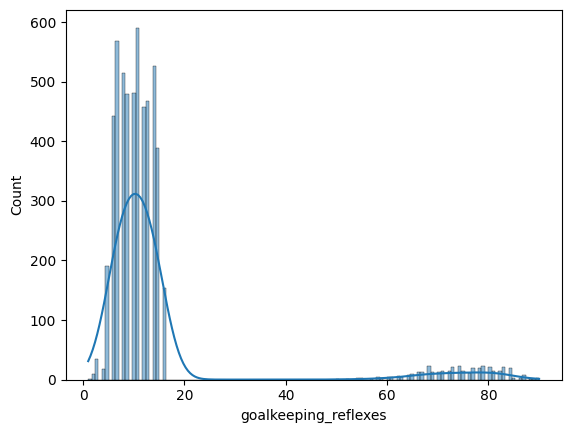

In [16]:
sns.histplot(df2['goalkeeping_reflexes'], kde=True)
plt.show()

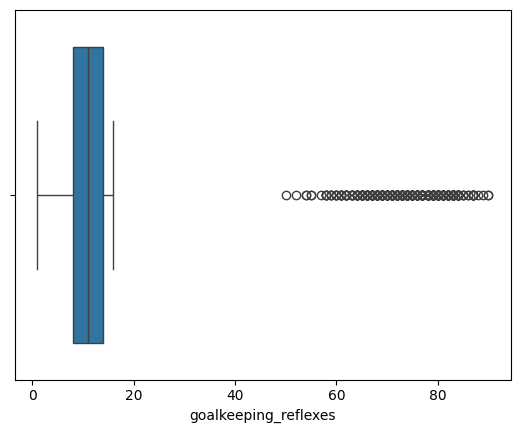

In [17]:
sns.boxplot(x=df2['goalkeeping_reflexes'])
plt.show()

In [18]:
columnss = ['position','goalkeeping_reflexes']
df2[columnss]

,position,goalkeeping_reflexes
0,Attacking Midfield,5.0
1,Attacking Midfield,6.0
2,Attacking Midfield,NaN
3,Attacking Midfield,NaN
4,Right-Back,13.0
...,...,...
5732,Centre-Forward,14.0
5733,Defensive Midfield,10.0
5734,Centre-Forward,12.0
5735,Centre-Forward,12.0


In [19]:
columnsss = ['position','mentality_composure']
df2[columnsss]

,position,mentality_composure
0,Attacking Midfield,50.0
1,Attacking Midfield,68.0
2,Attacking Midfield,80.0
3,Attacking Midfield,80.0
4,Right-Back,54.0
...,...,...
5732,Centre-Forward,NaN
5733,Defensive Midfield,NaN
5734,Centre-Forward,NaN
5735,Centre-Forward,NaN


In [31]:
mean_goal_reflexes_position = df2.groupby('position')['goalkeeping_reflexes'].mean()
mean_goal_reflexes_position.astype('int')
df2.loc[:, 'goalkeeping_reflexes'] = df2['goalkeeping_reflexes'].fillna(df2['position'].map(mean_goal_reflexes_position))

In [32]:
mean_mentality_composure_position = df2.groupby('position')['mentality_composure'].mean()
mean_mentality_composure_position.astype('int')
df2.loc[:, 'mentality_composure'] = df2['mentality_composure'].fillna(df2['position'].map(mean_mentality_composure_position))

In [35]:
df2.dtypes

height_cm                      int64
weight_kg                      int64
nationality                   object
overall                        int64
potential                      int64
preferred_foot                object
international_reputation       int64
weak_foot                      int64
skill_moves                    int64
contract_valid_until           int32
age                            int64
position                      object
short_pos                     object
fee                            int64
window                        object
league                        object
season                         int64
attacking_crossing             int64
attacking_finishing            int64
attacking_heading_accuracy     int64
attacking_short_passing        int64
attacking_volleys              int64
skill_dribbling                int64
skill_curve                    int64
skill_fk_accuracy              int64
skill_long_passing             int64
skill_ball_control             int64
m

In [34]:
# Chuyển đổi các cột float sang int
float_columns = df2.select_dtypes(include=['float']).columns
df2.loc[:, float_columns] = df2.loc[:, float_columns].astype('int64')


In [38]:
df2.to_csv('D:/DO_AN_TOT_NGHIEP/DU_LIEU/DATA_FINAL/Clean_Final_Data.csv',index=False, encoding='utf-8-sig')